In [ ]:
#Installation of package dependencies
#Do not run this if you already have the needed packages
!!pip install numpy scipy matplotlib

In [23]:
import os
os.system('pip install numpy')
os.system('pip install scipy')
os.system('pip install matplotlib')
import numpy as np
from scipy import interpolate
from scipy.linalg import lu, solve_triangular
from scipy.optimize import fsolve, minimize, golden, minimize_scalar,linprog
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt


In [13]:
#2.1
#Array declaration
A = np.array([
    [1,5,2,3],
    [1,6,8,6],
    [1,6,11,2],
    [1,7,17,4]
    ])
b = [1,2,1,1]
#LU decomposition
P,L,U = lu(A)
#dot product
Pb=np.dot(P,b)
#solving for y
y = np.linalg.solve(L,Pb)
#solving for x
x = np.linalg.solve(U,y)
#printing results
print(f'P:\n{P}\nL:\n{L}\nU:\n{U}')
print(f'product of L and U is:\n {np.matmul(L,U)}')
print(f'First we find y by solving Ly = b, so we get y = {y}.\nThen, we find x by solving Ux = y, so we get x = {x}')
print(f'The solution to the Linear equation is {np.linalg.solve(A,b)}' )
print(f'The dot product of A and x is {np.dot(A,x)}')

P:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
L:
[[ 1.   0.   0.   0. ]
 [ 1.   1.   0.   0. ]
 [ 1.   0.5  1.   0. ]
 [ 1.   0.5 -1.   1. ]]
U:
[[ 1.   5.   2.   3. ]
 [ 0.   2.  15.   1. ]
 [ 0.   0.   1.5 -1.5]
 [ 0.   0.   0.   1. ]]
product of L and U is:
 [[ 1.  5.  2.  3.]
 [ 1.  7. 17.  4.]
 [ 1.  6. 11.  2.]
 [ 1.  6.  8.  6.]]
First we find y by solving Ly = b, so we get y = [1. 0. 0. 1.].
Then, we find x by solving Ux = y, so we get x = [36. -8.  1.  1.]
The solution to the Linear equation is [36. -8.  1.  1.]
The dot product of A and x is [1. 2. 1. 1.]


In [20]:
#2.2

#Defining equations
def equations(vars):
    c1, c2, lam = vars
    eq1 = 1 / c1**2 - lam            # ∂L/∂c1 = 0 ⇒ 1/c1² - λ = 0
    eq2 = 1 / c2**2 - lam            # ∂L/∂c2 = 0 ⇒ 1/c2² - λ = 0
    eq3 = c1 + c2 - 1                # Budget constraint: c1 + c2 = 1
    return [eq1, eq2, eq3]

# Initial guess
initial_guess = [0.4, 0.6, 1.0] #These are arbitrary values, they can be anything. Guesses that are far away from the solution will take longer to converge.

# Solve the system
solution = fsolve(equations, initial_guess) #fsolve is a function that solves a system of nonlinear equations. It uses the newton method to find the solution.

# Print results
c1, c2, lam = solution #solution is an array of the solutions to the system of equations.
print(f"Numerical solution using :")
print(f"c1 = {c1:.4f}")
print(f"c2 = {c2:.4f}")
print(f"lambda = {lam:.4f}")

# Objective function (negative utility to perform maximization)
def neg_utility(c): 
    c1, c2 = c #c is an array of initial guesses for c1 and c2
    if c1 <= 0 or c2 <= 0: #check if the initial guesses are positive
        return np.inf   #if not, return infinity
    return 1 / c1 + 1 / c2  # Negative of (-1/c1 - 1/c2)

# Constraint: c1 + c2 = 1
constraint = { 
    'type': 'eq', #constraint type (equality)
    'fun': lambda c: c[0] + c[1] - 1 #constraint function (c1 + c2 = 1)
}

# Initial guess
initial_guess = [0.4, 0.6] #initial guess for c1 and c2

# Call the optimizer
result = minimize(neg_utility, initial_guess, method='SLSQP', constraints=constraint) #minimize is a function that minimizes a function. It uses the SLSQP method to find the solution.
#SLSQP is a Sequential Least Squares Programming method. It is a method for solving constrained optimization problems.

# Extract results
c1_opt, c2_opt = result.x #result.x is an array of the solutions to the optimization problem.  

print("Solution using minimization :")
print(f"c1 = {c1_opt:.4f}")
print(f"c2 = {c2_opt:.4f}")
print(f"Utility = {-neg_utility([c1_opt, c2_opt]):.4f}")


Numerical solution using :
c1 = 0.5000
c2 = 0.5000
lambda = 4.0000
Solution using minimization :
c1 = 0.5001
c2 = 0.4999
Utility = 4.0000


In [4]:
#2.3

#Function to Minimize
def function (x):
    return x*np.cos(x**2)

#golden search on interval
def golden_search_minimize (function, lower_bound, upper_bound): #function is the function to minimize, lower_bound is the lower bound of the interval, upper_bound is the upper bound of the interval

    return golden(function,brack=(lower_bound,upper_bound)) #golden is a function that finds the minimum of a function on an interval.



lower_bound = 0
upper_bound = 5
subinterval_num = 6
interval = [lower_bound,upper_bound]
subinterval_bounds = np.linspace(lower_bound,upper_bound,subinterval_num) #creates an array of subinterval bounds
subintervals = [(subinterval_bounds[i],subinterval_bounds[i+1]) for i in range(len(subinterval_bounds)-1)] #creates an array of subintervals

minima = [golden_search_minimize(function,subintervals[i][0],subintervals[i][1]) for i in range(len(subintervals))] #finds the minimum of the function on each subinterval
global_minimum_location = np.argmin(minima) #finds the index of the minimum of the function on the interval

for i in range(len(subintervals)):
    print(f'The local minimum on [{subintervals[i][0]},{subintervals[i][1]} is {minima[i]:.4f}]\n') #prints the local minimum of the function on each subinterval

print(f'\nThe global minimum is {minima[global_minimum_location]}') #prints the global minimum of the function on the interval

The local minimum on [0.0,1.0 is -0.8083]

The local minimum on [1.0,2.0 is 1.8145]

The local minimum on [2.0,3.0 is 4.6919]

The local minimum on [3.0,4.0 is 3.9673]

The local minimum on [4.0,5.0 is 3.9673]


The global minimum is -0.8082519339425334


Optimal consumption:
optimal c1 = 0.6669, optimal c2 = 0.6664, optimal c3 = 0.6667
Maximum utility = 4.5000


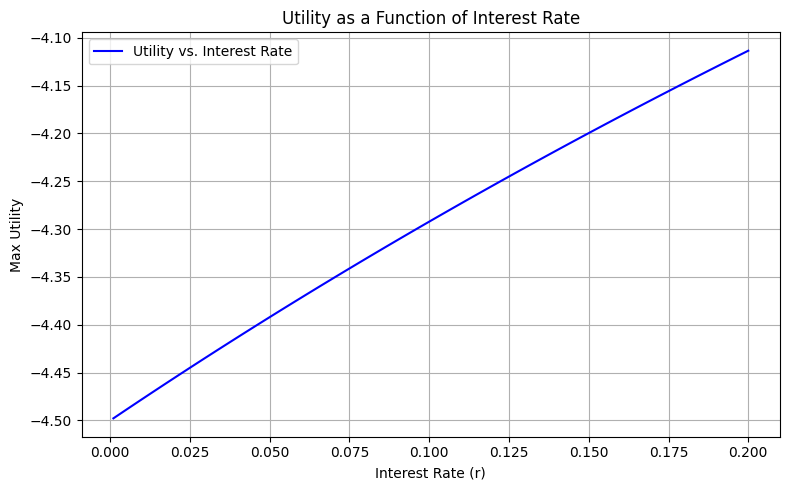

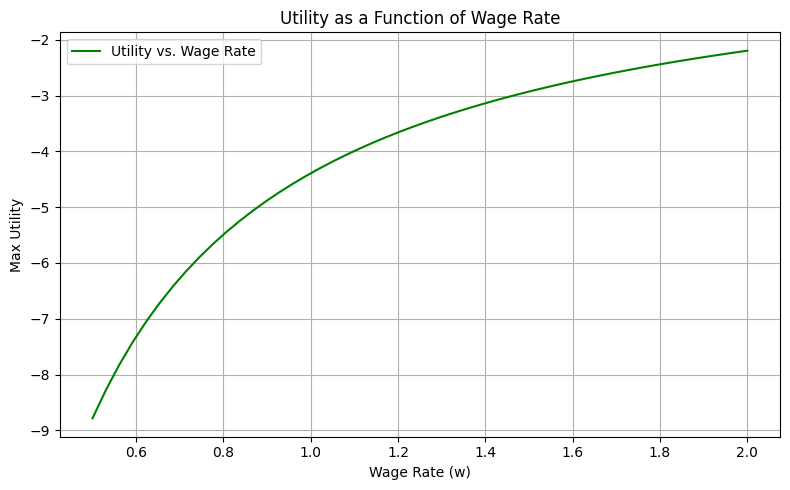

In [24]:
#2.4

# Parameters
gamma = 0.5
beta = 1

# Objective: Negative utility w.r.t c2, c3
def neg_utility_c2_c3(c, r, w):
    c2, c3 = c #c is an array of initial guesses for c2 and c3  
    rhs = w + w / (1 + r) #right hand side of the budget constraint
    c1 = rhs - c2 / (1 + r) - c3 / ((1 + r)**2) #solving for c1
    if c1 <= 0 or c2 <= 0 or c3 <= 0: #check if the initial guesses are positive
        return np.inf  # handle invalid values
    u1 = c1**(1 - 1/gamma) / (1 - 1/gamma) #utility function w.r.t c1
    u2 = beta * c2**(1 - 1/gamma) / (1 - 1/gamma)#utility function w.r.t c2
    u3 = beta**2 * c3**(1 - 1/gamma) / (1 - 1/gamma)#utility function w.r.t c3
    return -(u1 + u2 + u3) #negative utility function

def optimize_given_r_w(r, w): #function to optimize the utility function given r and w
    result = minimize(neg_utility_c2_c3, x0=[0.5, 0.5], args=(r, w), method='SLSQP') #minimize is a function that minimizes a function. It uses the SLSQP method to find the solution.
    if result.success: #check if the optimization was successful
        c2_opt, c3_opt = result.x #result.x is an array of the solutions to the optimization problem.
        rhs = w + w / (1 + r) #right hand side of the budget constraint
        c1_opt = rhs - c2_opt / (1 + r) - c3_opt / ((1 + r)**2) #solving for c1
        utility = -neg_utility_c2_c3((c2_opt, c3_opt), r, w)  # flip sign
        return utility
    else:
        return np.nan #if the optimization was not successful, return nan

# --- Single optimization at baseline ---
r = 0
w = 1
rhs = w + w / (1 + r) #right hand side of the budget constraint

initial_guess = [0.3, 0.3] #initial guess for c2 and c3
result = minimize(neg_utility_c2_c3, initial_guess, args=(r, w), method='SLSQP') #minimize is a function that minimizes a function. It uses the SLSQP method to find the solution.


# Extract results
optimal_c2, optimal_c3 = result.x #result.x is an array of the solutions to the optimization problem.
optimal_c1 = rhs - optimal_c2 / (1 + r) - optimal_c3 / ((1 + r)**2) #solving for c1
optimal_utility = neg_utility_c2_c3([optimal_c2, optimal_c3],r,w) #negative utility function

print(f"Optimal consumption:\noptimal c1 = {optimal_c1:.4f}, optimal c2 = {optimal_c2:.4f}, optimal c3 = {optimal_c3:.4f}\nMaximum utility = {optimal_utility:.4f}") #print the optimal consumption and maximum utility

# --- Plot 1: Utility vs. Interest Rate ---
r_vals = np.linspace(0.001, 0.2, 50) #create an array of interest rates
utilities_r = [optimize_given_r_w(r, w=1.0) for r in r_vals] #optimize the utility function given the interest rate and wage rate

plt.figure(figsize=(8, 5)) #create a figure 
plt.plot(r_vals, utilities_r, label='Utility vs. Interest Rate', color='blue') #plot the utility function vs the interest rate
plt.xlabel('Interest Rate (r)') #x-axis label
plt.ylabel('Max Utility') #y-axis label
plt.title('Utility as a Function of Interest Rate') #title
plt.grid(True) #grid
plt.legend() #legend
plt.tight_layout()
plt.savefig('utility_vs_interest_rate.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Plot 2: Utility vs. Wage Rate ---
w_vals = np.linspace(0.5, 2.0, 50) #create an array of wage rates
utilities_w = [optimize_given_r_w(r=0.05, w=w) for w in w_vals] #optimize the utility function given the interest rate and wage rate

plt.figure(figsize=(8, 5)) #create a figure
plt.plot(w_vals, utilities_w, label='Utility vs. Wage Rate', color='green') #plot the utility function vs the wage rate
plt.xlabel('Wage Rate (w)') #x-axis label
plt.ylabel('Max Utility') #y-axis label
plt.title('Utility as a Function of Wage Rate') #title
plt.grid(True) #grid
plt.legend() #legend
plt.tight_layout()
plt.savefig('utility_vs_wage_rate.png', dpi=300, bbox_inches='tight')
plt.show()



polynomial:         2
-0.125 x + 10 x - 1.175e-11
Revenue-maximizing tax rate: τ* = 40.0000
Revenue at the revenue-maximizing tax rate: τ* = 200.0000


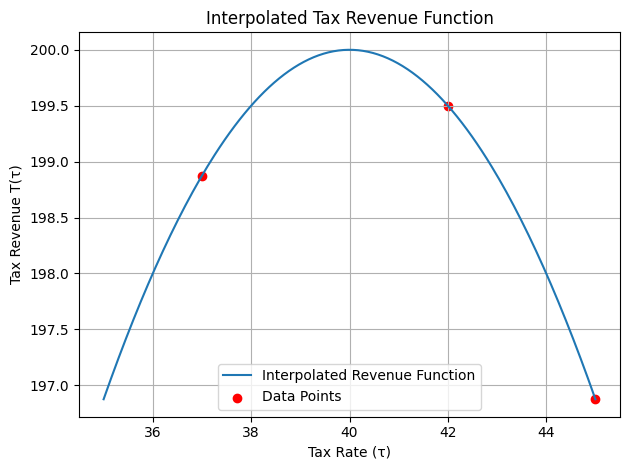

In [17]:
#2.7
#data decleration

tax_rates = np.array([37, 42, 45]) #array of observed tax rates
tax_revenue = np.array([198.875, 199.5, 196.875]) #array of observed tax revenue

#polinomial interpolation
coefficients = np.polyfit(tax_rates,tax_revenue,deg=2) #fit a polynomial of degree 2 to the data
polynomial = np.poly1d(coefficients) #returns a representation of the polynomial's coefficients, in decreasing powers.
                                     #For example, poly1d([1, 2, 3]) returns an object that represents x**2 + 2*x + 3

print(f'polynomial: {polynomial}')#print the polynomial

#evaluatie the function at different values
tax_rate_range = np.linspace(35, 45, 200) #create an array of tax rates
revenue_vals = polynomial(tax_rate_range) #evaluate the polynomial at the tax rates

# Maximizing revenue by minimizing the negative tax revenue function
result = minimize_scalar(lambda t: -polynomial(t), bounds=(35, 45), method='bounded') #minimize the negative tax revenue function
optimal_tax_rate = result.x #result.x is the tax rate that maximizes the revenue
revenue_max = polynomial(optimal_tax_rate) #evaluate the polynomial at the optimal tax rate

print(f"Revenue-maximizing tax rate: τ* = {optimal_tax_rate:.4f}")
print(f"Revenue at the revenue-maximizing tax rate: τ* = {revenue_max:.4f}")

# Plot
plt.plot(tax_rate_range, revenue_vals, label="Interpolated Revenue Function") #plot the interpolated revenue function
plt.scatter(tax_rates, tax_revenue, color='red', label="Data Points") #plot the data points
plt.xlabel("Tax Rate (τ)") #x-axis label
plt.ylabel("Tax Revenue T(τ)") #y-axis label
plt.title("Interpolated Tax Revenue Function") #title
plt.grid(True) #grid
plt.legend()
plt.tight_layout()
plt.savefig('tax_revenue_fig.png', dpi=300, bbox_inches='tight')
plt.show()

#piecewise - linear is well fit for linear, our function is not linear
#Cubic spine - poorly describes global properties which are required here (concavity)


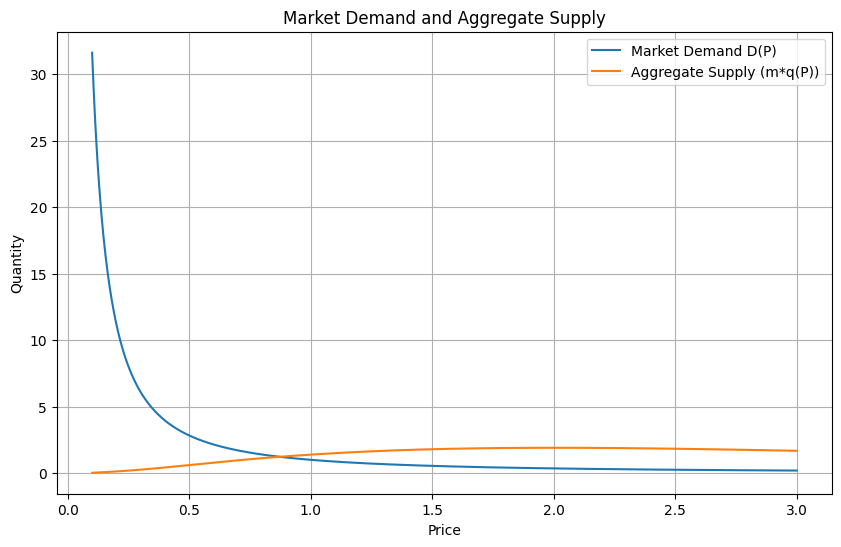

Equilibrium price: 0.8718, Quantity: 1.2285
Increasing m leads to more competition, pushing price down and quantity up.
Increasing α makes costs higher, reducing supply and increasing price.
Increasing η makes demand more elastic: flattens demand, leading to more responsive price changes.


In [15]:
#2.9
# Parameters
alpha = 1.0 #alpha represents the cost of production
eta = 1.5 #eta represents the elasticity of demand
m = 3 #m represents the number of firms
N = 10 #N represents the number of price points
NP = 1000 #NP represents the number of points for the fine price grid

# Price grid: equidistant in [0.1, 3.0]
P_grid = np.linspace(0.1, 3.0, N + 1) #create a price grid

# Demand function
def D(P):
    return P ** (-eta) 

# Derivative of demand w.r.t price
def D_prime(P):
    return -eta * P ** (-eta - 1)

# Marginal cost function
def marginal_cost(q):
    return alpha * np.sqrt(q) + q**2

def firm_quantity(P):
    def F(q):
        if q < 0: #check if the quantity is negative
            return 1e6  # penalize negative q
        MB = P + q * (1 / D_prime(P)) * (1 / m) #marginal benefit
        MC = marginal_cost(q) #marginal cost
        return MB - MC

    q_guess = D(P) / m  # initial guess based on equal split
    q_sol, = fsolve(F, q_guess) #solve for the quantity
    return max(q_sol, 0)  # ensure non-negative quantity

def excess_demand(P):
    if P <= 0:
        return 1e6  # penalize non-positive prices
    return D(P) - m * spline_q(P)

# Compute quantities for each price
q_values = np.array([firm_quantity(P) for P in P_grid])

# Interpolation using CubicSpline
spline_q = CubicSpline(P_grid, q_values)

# Fine price grid for plotting
P_fine = np.linspace(0.1, 3.0, NP) #create a fine price grid
q_interp = spline_q(P_fine) #interpolate the quantity


#Solve for the equilibrium
P_eq_guess = 1.0
P_eq, = fsolve(excess_demand, P_eq_guess)
Q_eq = D(P_eq)


# Plot demand and individual supply
plt.figure(figsize=(10, 6)) #create a figure
plt.plot(P_fine, D(P_fine), label="Market Demand D(P)") #plot the demand
plt.plot(P_fine, m * q_interp, label="Aggregate Supply (m*q(P))") #plot the aggregate supply
plt.xlabel("Price") #x-axis label
plt.ylabel("Quantity") #y-axis label
plt.title("Market Demand and Aggregate Supply") #title
plt.legend() #legend
plt.grid(True) #grid
plt.savefig('cournot_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Equilibrium price: {P_eq:.4f}, Quantity: {Q_eq:.4f}")
print("Increasing m leads to more competition, pushing price down and quantity up.\nIncreasing α makes costs higher, reducing supply and increasing price.\nIncreasing η makes demand more elastic: flattens demand, leading to more responsive price changes.") 



In [16]:
#2.10
#Price grids
reader_prices = np.linspace(0.5, 12.5, 4)  # Reader price grid (rows)
ad_prices = np.linspace(0.5, 12.5, 4)  # Ad price grid (columns)

#Profit matrix G(pR, pA)
G = np.array([
    [11.5, 70.9, 98.3, 93.7],
    [31.1, 82.5, 101.9, 89.3],
    [18.7, 62.1, 73.5, 52.9],
    [-25.7, 9.7, 13.1, -15.5]
])

#spline interpolation
spline_G = interpolate.RectBivariateSpline(reader_prices, ad_prices, G)

#Evaluate the profit matrix at the fine price grid
Nplot = 100 #number of points for the fine price grid
reader_prices_fine = np.linspace(0.5, 12.5, Nplot) #create a fine price grid for the reader
ad_prices_fine = np.linspace(0.5, 12.5, Nplot) #create a fine price grid for the ad
profit_matrix = spline_G(reader_prices_fine, ad_prices_fine) #evaluate the profit matrix at the fine price grid

# maximum profit location
max_idx = np.unravel_index(np.argmax(profit_matrix), profit_matrix.shape) #Returns the indices of the maximum value in the 2D matrix (using argmax would have returned the flattened index)
reader_price_optimal = reader_prices_fine[max_idx[0]] #optimal reader price
ad_price_optimal = ad_prices_fine[max_idx[1]] #optimal ad price
profit_optimal = profit_matrix[max_idx] #optimal profit

print(f"(a) Optimal prices from interpolation: pR* = {reader_price_optimal:.2f}, pA* = {ad_price_optimal:.2f}")
print(f"    Maximum approximated profit: G(pR*, pA*) = {profit_optimal:.2f}")

#profit function
def true_profit(prices):
    reader_price, ad_price = prices
    reader_demand = 10 - reader_price #demand for the reader
    ad_demand = 20 - ad_price - 0.5 * reader_price #demand for the ad
    if reader_demand < 0 or ad_demand < 0:#check if the demand is positive  
        return -1e6  # Penalize infeasible demand
    profit = (reader_price - 0.1) * reader_demand + (ad_price - 0.1) * ad_demand #profit
    return -profit  # sign change to maximize profit

# Minimize the function
res = minimize(true_profit, x0=[5.0, 5.0], bounds=[(0.5, 12.5), (0.5, 12.5)])
reader_price_optimal, ad_price_optimal = res.x
profit_optimal = -res.fun #sign change to maximize profit

print(f"(b) Optimal prices from true profit: pR* = {reader_price_optimal:.2f}, pA* = {ad_price_optimal:.2f}")
print(f"    Maximum true profit: G(pR*, pA*) = {profit_optimal:.2f}")

#Considering different Nplots for smoothing
for Nplot in [100, 1000, 10000]:
    reader_prices_fine = np.linspace(0.5, 12.5, Nplot)
    ad_prices_fine = np.linspace(0.5, 12.5, Nplot)
    profit_matrix = spline_G(reader_prices_fine, ad_prices_fine)
    max_idx = np.unravel_index(np.argmax(profit_matrix), profit_matrix.shape)
    reader_price_optimal = reader_prices_fine[max_idx[0]]
    ad_price_optimal = ad_prices_fine[max_idx[1]]
    profit_optimal = profit_matrix[max_idx]
    error = abs(profit_optimal - profit_optimal)
    print(f"Nplot = {Nplot}: Approx Profit = {profit_optimal:.2f}, Error = {error:.4f}")


(a) Optimal prices from interpolation: pR* = 2.68, pA* = 9.35
    Maximum approximated profit: G(pR*, pA*) = 105.00
(b) Optimal prices from true profit: pR* = 2.73, pA* = 9.37
    Maximum true profit: G(pR*, pA*) = 105.01
Nplot = 100: Approx Profit = 105.00, Error = 0.0000
Nplot = 1000: Approx Profit = 105.01, Error = 0.0000
Nplot = 10000: Approx Profit = 105.01, Error = 0.0000


In [23]:
#2.11
# Cost matrix (flattened row-wise). 0s at the end for the dummy destination
costs = np.array([
    10, 70, 100, 80, 0,   # A1
    130, 90, 120, 110, 0, # A2
    50, 30, 80, 10, 0     # A3
])

# Supply from A1, A2, A3
supply = [11, 13, 10]

# Demand from B1, B2, B3, B4 + dummy B5 for the excess supply
demand = [5, 7, 13, 6, 3]

#constraint matrix
num_sources = 3
num_destinations = 5
n_variables = num_sources * num_destinations #number of variables

# Supply constraints (rows: each source)
supply_constraints   = np.zeros((num_sources, n_variables)) #creating a matrix of zeros
for i in range(num_sources):
    for j in range(num_destinations):
        supply_constraints[i, i * num_destinations + j] = 1 #setting the supply constraints

# Demand constraints (columns: each destination)
demand_constraints = np.zeros((num_destinations, n_variables)) #creating a matrix of zeros
for j in range(num_destinations):
    for i in range(num_sources):
        demand_constraints[j, i * num_destinations + j] = 1 #setting the demand constraints

# Combine all constraints
A_eq = np.vstack([supply_constraints, demand_constraints]) #stacking the supply and demand 
b_eq = np.array(supply + demand) #creating a vector of constraints

# Bounds
bounds = [(0, None)] * n_variables #setting the bounds

# Solve
res = linprog(c=costs, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs') #solving the linear program

# Extract result
if res.success:
    X = res.x.reshape((num_sources, num_destinations)) #reshaping the solution
    print("Optimal transport plan (tons from Ai to Bj):")
    for i in range(num_sources):
        for j in range(num_destinations): 
            if X[i, j] > 0:#check if the solution is positive
                print(f"A{i+1} -> B{j+1}: {X[i, j]:.2f} tons") #print the solution
    print(f"\nMinimum total cost: {res.fun:.2f}") #print the minimum total cost
else: 
    print("Optimization failed.")

Optimal transport plan (tons from Ai to Bj):
A1 -> B1: 5.00 tons
A1 -> B3: 6.00 tons
A2 -> B2: 3.00 tons
A2 -> B3: 7.00 tons
A2 -> B5: 3.00 tons
A3 -> B2: 4.00 tons
A3 -> B4: 6.00 tons

Minimum total cost: 1940.00
